In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

df = pd.read_csv("ZillowData/ZillowData2.csv")
df = df.drop(["Property Address","Geographic ID","Type","Property ID","Owner Name","zillow_id","Appraisel_Year","tax_year","tax_value"], axis=1)
df = df.loc[df["home_type"]== "SingleFamily",:]
df["Appraised Value"]=df["Appraised Value"].replace({'\$': '', ',': ''}, regex=True)
df = df[pd.notnull(df["bedrooms"])]
df = df[pd.notnull(df["bathrooms"])]

df.head(5)


,Appraised Value,Zip,home_type,year_built,property_size,home_size,bathrooms,bedrooms,last_sold_date,last_sold_price,zestimate_amount,best_estimate,best_estimate_$perFt
0,688000,78702,SingleFamily,2008.0,5410.0,1680.0,2.0,3.0,NaN,NaN,576032.0,688000,409.53
8,417950,78702,SingleFamily,1943.0,6046.0,1390.0,2.0,4.0,NaN,NaN,721234.0,721234,518.88
10,523600,78702,SingleFamily,1962.0,5749.0,1343.0,2.0,2.0,NaN,NaN,484131.0,523600,389.88
11,451996,78702,SingleFamily,1964.0,5749.0,1224.0,2.0,4.0,NaN,NaN,464047.0,464047,379.13
12,605634,78702,SingleFamily,1940.0,5706.0,1699.0,2.0,4.0,NaN,NaN,558126.0,605634,356.47


In [ ]:
homeValues = df.drop(["year_built","last_sold_date","last_sold_price"], axis=1)

#Dataframe for Construction
yr_built = df.drop(["Appraised Value","zestimate_amount"], axis=1)
yr_built = yr_built[pd.notnull(yr_built["year_built"])]
yr_built["year_built"] = yr_built["year_built"].astype(int)
yr_built["home_size"] = yr_built["home_size"].astype(int)
yr_built = yr_built[pd.notnull(yr_built["last_sold_date"])]

#Historical House prices based on Zillow last_sold_price
yr_price = yr_built[pd.notnull(yr_built["last_sold_price"])]
yr_prices =yr_price.copy().reset_index()
yr_prices["sold_year"] = pd.to_datetime(yr_prices["last_sold_date"]).dt.year
yr_prices = yr_prices.drop(["last_sold_date","index","home_type","home_size","bathrooms","property_size","bedrooms","year_built"], axis=1)
yr_prices["last_sold_price"] = yr_prices["last_sold_price"].astype(int)

# Sort,Group, and Remove outliers
yr_price02 = yr_prices.loc[yr_prices["Zip"] == 78702,:].sort_values("last_sold_price", ascending = False)
yr_price45 = yr_prices.loc[yr_prices["Zip"] == 78745,:].sort_values("last_sold_price", ascending = False)






#yr_group = yr_prices.groupby(["year_built"], as_index=False).agg({'last_sold_price':'mean'})
#yr_group2 = yr_group.sort_values("year_built",ascending=False).reset_index(drop=True)

#df.head(3)
yr_price02.head(3)

#incomes.head(3)

In [154]:
yr_group3 = yr_group2.pivot(index='year_built',columns='Zip',values='last_sold_price')

incomes = pd.read_csv("ZillowData/TravisAustinMedianHouseholdIncome.csv")
incomes = incomes.replace({'\$': '', ',': ''}, regex=True)

MeanCostCompare = pd.merge(incomes,yr_group3, how='inner',left_on='Date', right_on='year_built')
MeanCostCompare=MeanCostCompare.dropna(how='any')
MeanCostCompare = MeanCostCompare.drop(["US","Texas","Travis County"], axis=1)
MeanCostCompare["Austin"] = MeanCostCompare["Austin"].astype(int)
#MeanCostCompare.columns
MeanCostCompare.head()

,Date,Austin,78702,78745
0,2017,73800,550491.0,276500.0
1,2016,72527,639085.0,362990.0
2,2015,69525,540524.0,399380.0
4,2013,65085,501800.0,308000.0
5,2012,63571,140333.0,337500.0


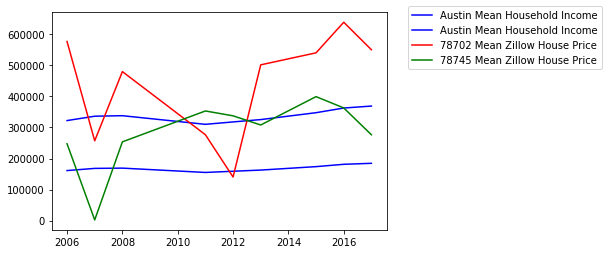

In [174]:
D = MeanCostCompare["Date"].tolist()
AUS = MeanCostCompare["Austin"].tolist()
zip78702 = MeanCostCompare[78702].tolist()
zip78745 = MeanCostCompare[78745].tolist()

Austin_HI = [ i * 5 for i in AUS]
Austin_LO = [ i * 2.5 for i in AUS]


plt.plot(D,Austin_HI, color='b', label="Austin Mean Household Income")
plt.plot(D,Austin_LO, color='b', label="Austin Mean Household Income")
plt.plot(D,zip78702, color='r', label= "78702 Mean Zillow House Price")
plt.plot(D,zip78745, color = 'green', label="78745 Mean Zillow House Price")
plt.legend(loc="best", bbox_to_anchor=(1.05, 1.05))
plt.show()

In [166]:
#Using T Data Not Zillow

incomesT = pd.read_csv("ZillowData/IncomeZipCompare.csv")
incomesT = incomesT.replace({'\$': '', ',': ''}, regex=True)
incomesT = incomesT.apply(pd.to_numeric)
incomesT.head()



,Year,Austin,zip_78702,zip_78745
0,2017,73800,451878,321712
1,2016,72527,432900,308359
2,2015,69525,417867,294359
3,2014,65922,368834,252142
4,2013,65085,300550,215125


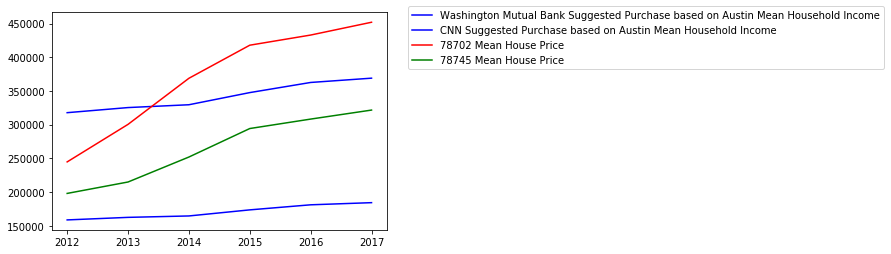

In [172]:
D2 = incomesT["Year"].tolist()
AUS2 = incomesT["Austin"].tolist()
zip78702_ = incomesT["zip_78702"].tolist()
zip78745_ = incomesT["zip_78745"].tolist()

Austin_HI2 = [ i * 5 for i in AUS2]
Austin_LO2 = [ i * 2.5 for i in AUS2]

plt.plot(D2,Austin_HI2, color='b', label="Washington Mutual Bank Suggested Purchase based on Austin Mean Household Income")
plt.plot(D2,Austin_LO2, color='b', label="CNN Suggested Purchase based on Austin Mean Household Income")
plt.plot(D2,zip78702_, color='r', label= "78702 Mean House Price")
plt.plot(D2,zip78745_, color = 'green', label="78745 Mean House Price")
plt.legend(loc="best", bbox_to_anchor=(1.05, 1.05))
plt.show()